# Seaborn Tutorial using Titanic Data
*Work in Progress

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div> 

Here is a list of plots that we will be covering in this tutorial: <br>
- Bar Plot
- Histograms
- Scatter Plot 
- Line Plot 
- Catplot (Strip, Swarm) 
- Clustermap 
- Box Plots 
- KDE Plots (1-D and 2-D) 
- Violin Plot 
- Countplot 
- Sklearn Plots (Helpful when visualising 2-D models) 

<br> Personally, I picked up Seaborn when working on `UK accidents` Data Set. However, for the purposes of this tutorial we shall be refering to the `Titanic` Data set. <br>
The titanic Data Set is available here: **< enter data url >**
<br><br>
For an example of application of seaborn, refer to https://github.com/aroraaman123/Data_Science_Projects/tree/master/UK_Accidents_EDA_using%20Seaborn
<br><br>
**NOTE:** The purposes of this notebook are only to introduce the reader to various Seaborn Plots using Seaborn dataset and not Exploratory Data Analysis. 

**REFERENCES:**<br>
- General Assembly, Sydney -Various iPython Notebooks -
Taught by: **Dima Galat** (https://www.linkedin.com/in/dimagalat/)
- Seaborn Documentation (https://seaborn.pydata.org/index.html)
- Various Kaggle Kernels for reference
- http://www.storytellingwithdata.com/ 

In [2]:
#libraries
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np

#config
# pd.set_option('display.max_colwidth', -1)

pd.set_option("display.max_rows",120)
pd.set_option("display.max_columns",120)

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
#importing titanic data
titanic_path = '/Users/user/Desktop/Folders/Data_Scientist/Github Desktop_Repo_PTDS/intro-ds/lessons/11-decision-trees-master/data/titanic.csv'
titanic = pd.read_csv(titanic_path)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For introduction to titanic data, refer to https://www.kaggle.com/c/titanic/data

**COUNTPLOTS** 

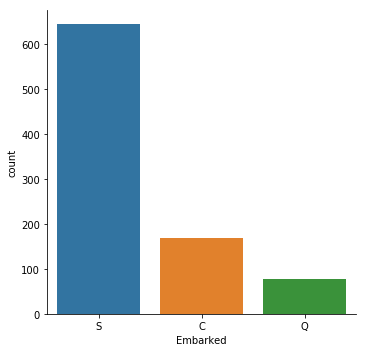

In [21]:
sns.catplot(x = 'Embarked', 
            data = titanic, 
            kind = 'count',
           );

We could have also used `sns.countplot()` in the above code without specifying `kind` which will produce the same result. However, with catplots in Seaborn, I can specify various other chart types and therefore, I prefer using catplots over countplots. 

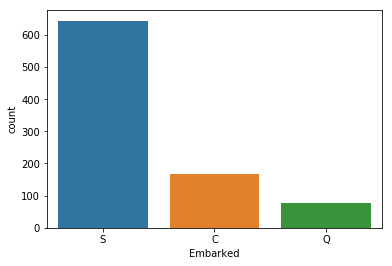

In [23]:
sns.countplot(x = 'Embarked', 
              data = titanic, 
             );

A countplot displays the count of the X axis variables found in our dataset. From the above countplot, it is evident that ~650, 180, 100 passengers embarked from ports S, C, Q on our titanic data set respectively. 

Say we wanted to separate the people who survived from the people who did not survive for the above plot. A good way of doing this would be to use `Hue` in our countplot. `Hue` differentiates the values based on the column name specified. 

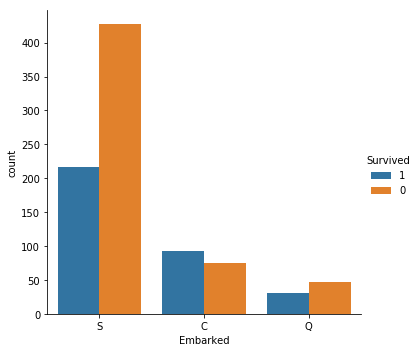

In [43]:
sns.catplot(x = 'Embarked', 
            data = titanic, 
            kind = 'count',
            hue = 'Survived',
            hue_order = [1,0],
#             colors = ['Red','Blue']
           );

After adding hue, only interpreting above data, it is evident that more passengers died when they embarked from ports 'S' and 'Q' however, the survival rate for Passengers that Embarked from port 'C' was more. 

Here is seaborn countplot documentation:
`seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)` <br>
Other variables that can be passed are: <br>
- order: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects. Say we wanted to order port 'C' first, then S followed by port 'Q'. I would pass an array `['C','S','Q']` to the order variable when plotting my countplot.
- hue_order: In the above graph survived '0' is Blue whereas '1' is Orange. Say I want to change this order, I would pass an array `[1,0]` to my hue_order variable which specifies that please provide hue to class 1 first. This is generaly used when passing `palette` variable to the chart. 

**BAR PLOTS**

Bar plots are generally used for comparing values in Categorical variables.

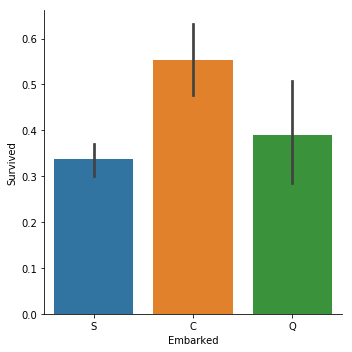

In [16]:
sns.catplot(x = 'Embarked', 
            y = 'Survived',
            data = titanic, 
            kind = 'bar'
           );

In a sns bar plot, unlike pandas, we specify column names as our X and Y values and pass the dataframe along as `data`. It is evident that in Seaborn 

It is evident that in barplots, percentages are displayed for every column. Since our Y column is Survived, a bar plot plots the percentage of passengers that survived. <br>
One way to interpret the above chart would be to look at port 'S' and say ~35% of the passengers survived, therefore, ~65% of the passengers must not have survived. Similarly, for port 'C' the survival rate of passengers (irrespective of gender) is more than 50%. 

Say we wanted to have a look at the percentage of passengers that survived based on their gender and the port the passengers embarked the Titanic Ship from.

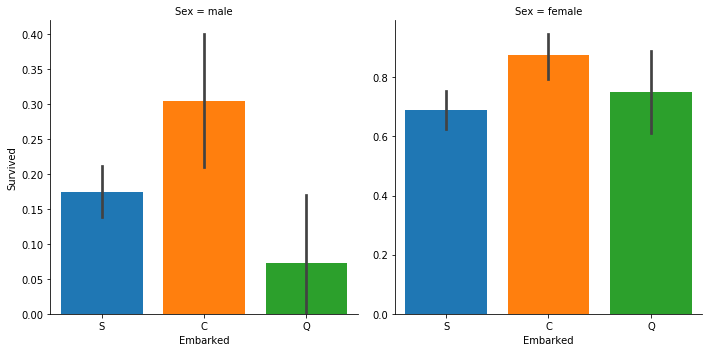

In [27]:
sns.catplot(x = 'Embarked', 
            y = 'Survived', 
            data = titanic, 
            kind = 'bar', 
            col = 'Sex', 
            sharey = False, 
            saturation = 1);

One thing that strikes out is more than 80% of the females survived when they embarked from Port 'C' 